# Apply Original Effects

This Jupyter Notebook aims to apply the original effects on the Guitar Chords v2 Dataset. The output oudio files will be stored in a target directory.

### Imports and methods

In [42]:
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import json
import soundfile as sf
from pathlib import Path
from numpy import random
from IPython.display import Audio
from pedalboard import Pedalboard, Compressor, Chorus, Reverb, Distortion, HighpassFilter, LowpassFilter
from pedalboard.io import AudioFile

In [43]:
def plot_audio(audio, sr, title):
    fig = plt.figure(figsize=(6, 3))
    plt.plot(np.arange(len(audio[0]))/sr, audio[0])
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(alpha=0.4)
    plt.show()

In [44]:
def get_random_audio(lst_audio_paths, samplerate):
    filepath = lst_audio_paths[random.randint(0, len(lst_audio_paths)-1)]
    with AudioFile(str(filepath)).resampled_to(samplerate) as f:
        audio = f.read(f.frames)
    return filepath, audio

### Initial parameters

In [45]:
preprocessed_original_dataset_path = Path('../datasets/guitar_chords_v2/preprocessed_original/audio_files/')
output_dataset_path                = Path('../datasets/guitar_chords_v2/fx/')
lst_audio_paths                    = list(preprocessed_original_dataset_path.iterdir())
samplerate                         = 16000
pcm                                = 'PCM_16'

In [46]:
dict_params = {
    'qtty_wav_files': len(lst_audio_paths),
    'samplerate': samplerate,
    'pcm': pcm,
    'fx':{
        'Compressor': {
            'threshold_db': -24, 
            'ratio':        10,
            'attack_ms':    20,
            'release_ms':   250
        },
        'Chorus': {
            'rate_hz':         1,
            'depth':           0.3,
            'centre_delay_ms': 7,
            'feedback':        0.05,
            'mix':             0.6
        },
        'Distortion': {
            'drive_db': 14
        },
        'Reverb': {
            'room_size': 1,
            'damping':   0.3,
            'wet_level': 0.8,
            'dry_level': 0.2,
            'width':     0.9
        },
        'LowpassFilter': {
            'cutoff_frequency_hz': 200
        },
        'HighpassFilter': {
            'cutoff_frequency_hz': 5000
        }
    }
}

with open(output_dataset_path/'parameters.json', mode='w') as f:
    json.dump(dict_params, f, indent=4)

### Random sample check

In [51]:
fx_name = 'Compressor'
params  = dict_params['fx'][fx_name]

board = Pedalboard([
    eval(fx_name)(**params)
])

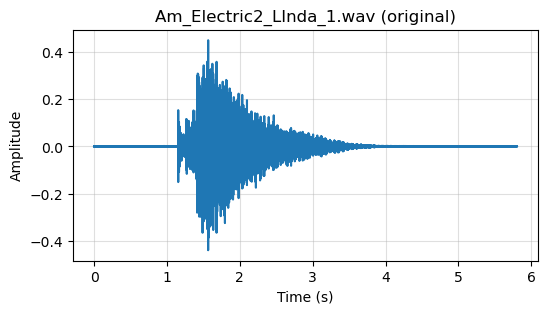

In [52]:
filepath, audio = get_random_audio(lst_audio_paths, samplerate)
plot_audio(audio, samplerate, '{} (original)'.format(filepath.name))
Audio(data=audio, rate=samplerate)

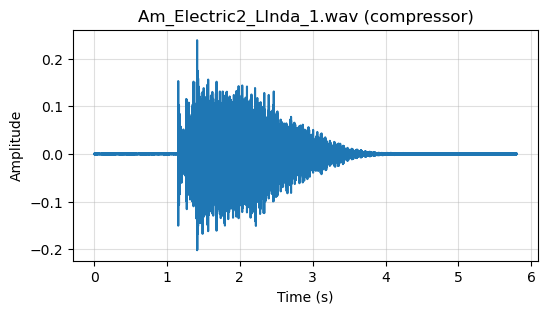

In [53]:
audio_fx = board(audio, samplerate)
plot_audio(audio_fx, samplerate, '{} ({})'.format(filepath.name, fx_name.lower()))
Audio(data=audio_fx, rate=samplerate)

### Applying effects and saving files

In [50]:
for fx_name, params in dict_params['fx'].items():
    
    print('{}...'.format(fx_name), end=' ')
    
    output_dir = output_dataset_path/fx_name
    if not output_dir.is_dir():
        output_dir.mkdir()
    
    board = Pedalboard([eval(fx_name)(**params)])
    
    for filepath in lst_audio_paths:
        with AudioFile(str(filepath)).resampled_to(samplerate) as f:
            audio = f.read(f.frames)
        audio_fx = board(audio, samplerate)
        sf.write(output_dir/filepath.name, audio_fx[0], samplerate, pcm)
        
    print('OK')

Compressor... OK
Chorus... OK
Distortion... OK
Reverb... OK
LowpassFilter... OK
HighpassFilter... OK
